C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


started


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


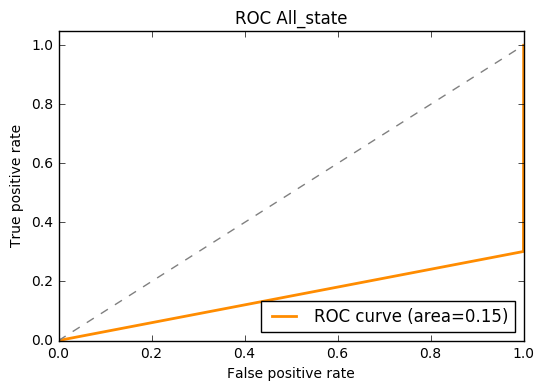

done


In [1]:
#AUTHOR RONALD TURYATEMBA
#USING ROC_AUC TO MEASURE PERFORMANCE OF GRADIENT BOOSTING CLASSIFIER 
#USING THE DATA UPON WHICH PRINCIPAL COMPONENT ANALYSIS HAS BEEN DONE 

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation
from sklearn.cross_validation import KFold,cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
print('started')
df_credit = pd.read_csv('../input/creditcard.csv',header=0)
df_credit
x =df_credit.drop(['Class'], axis=1)
y = df_credit['Class']

#binarize the class data that is y
y_array = np.array(y)
y = label_binarize(y_array, classes=[0,1])
#this will count the number of elements in row
#n_classses = y.shape[1]
n_classes = 2

#shuffle and slipt the the data into training and test sets
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=0)


#using the gradient boosting algorithm
GBC = GradientBoostingClassifier(n_estimators=100, learning_rate=2.0, max_depth=1,random_state=0, presort='TRUE')

#train the classifier with the train data
y_score = GBC.fit(X_train,y_train).predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
#a dictionary is initialised for the false positive rate and true positive rate
#plus the roc_ area under the curve 
#fpr is the false positve rate and tpr is the true positive rate

fpr[0],tpr[0],_ = roc_curve(y_test[:,0], y_score[:,0])
#we have an underscore there because this functions returns 3 values 
#but we dont need the third value therefore place a an underscore there

roc_auc[0] = auc(fpr[0],tpr[0])
#plot the figure
plt.figure()
lw=2
plt.plot(fpr[0],tpr[0], color='darkorange',lw=lw,label='ROC curve (area=%0.2f)' %roc_auc[0])
plt.plot([0,1],[0,1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC All_state')
plt.legend(loc='lower right')
plt.show()

print('done')